## FRB Traffic Light Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pkl
import pandas as pd
import glob
import os

%matplotlib inline

In [2]:
CRITERIAPATH = '/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/'

TerrLblDict = {'ALFAGAIN':'ALFA Gain',
               'B1859_03':'B1859+03',
               'LOFARRADAR':'LOFAR-UK RADAR',
               'LOWSNR':'Low S/N',
               'Perytons':'Perytons',
               'XAOREPEATER':'XAO Repeater'}

colOrder = ['compDMfrac', 'snrDMfrac', 'SNR', 'flux', 'pulsewidth', 'multicomp',\
            'polarization', 'broadband', 'spectralIndex', 'highResStruct', 'dmSpace',\
            'dispersionRelation', 'bandpass', 'lowAltitude', 'sysNoise', 'correctFeed',\
            'obsLog', 'electronics', 'repeats', 'gain', 'lowSNRsearch', 'multiBeam',\
            'TAB', 'interferometric', 'multiSite',
            'empty',
            'dataSingleBeam', 'dataMultiBeam',\
            'dataTAB', 'dataInterferometric', 'dataMultiSite', 'dataVoltages']

CritLblDict = {
    'compDMfrac':'Component-Optimized DM',
    'snrDMfrac':'S/N-maximized DM',
    'SNR':'S/N',
    'flux':'Flux',
    'pulsewidth':'Pulse Width',
    'multicomp':'Multiple Components',
    'polarization':'Polarization',
    'broadband':'Broad-band',
    'spectralIndex':'Spectral Index',
    'highResStruct':'High-resolution Structure',
    'dmSpace':'DM Trial Space',
    'dispersionRelation':'Dispersion Relation',
    'bandpass':'Bandpass',
    'lowAltitude':'Low-altitude Pointing',
    'sysNoise':'System Noise',
    'correctFeed':'Correct Feed Position',
    'obsLog':'Observation Log',
    'electronics':'System Electronics',
    'repeats':'Repeats',
    'gain':'Gain Stability',
    'lowSNRsearch':'Low-S/N DM Search',
    'multiBeam':'Multi-Beam Obs',
    'TAB':'Tied-Array Beam Obs',
    'interferometric':'Interferometric Obs',
    'multiSite':'Multi-Site Obs',
    'empty':'',
    'dataSingleBeam':'Single-Beam Data',
    'dataMultiBeam':'Mulit-Beam Data',
    'dataTAB':'Tied-Array Beam Data',
    'dataInterferometric':'Interferometric Data',
    'dataMultiSite':'Multi-Site Data',
    'dataVoltages':'Voltage Data'
}

In [3]:
criteriaFiles = glob.glob(CRITERIAPATH + '*.pkl')

FRBCrits = {}
TerrCrits = {}

for cf in criteriaFiles:
    FRBName = os.path.basename(cf).split('.')[1]
    print cf
    critDict = pkl.load(open(cf, 'rb'))
    
    if FRBName.startswith('FRB'):
        FRBCrits['FRB '+FRBName[3:]] = pd.Series(critDict)
    else:
        if FRBName in TerrLblDict.keys():
            TerrCrits[TerrLblDict[FRBName]] = pd.Series(critDict)
        else:
            TerrCrits[FRBName] = pd.Series(critDict)

FRBdf = pd.DataFrame(FRBCrits).transpose()
FRBdf.sort_index(inplace=True)
FRBdf['empty'] = np.nan
FRBdf = FRBdf[colOrder]
FRBdf.rename(columns=CritLblDict, inplace=True)

Terrdf = pd.DataFrame(TerrCrits).transpose()
Terrdf['empty'] = np.nan
Terrdf = Terrdf[colOrder]
Terrdf.rename(columns=CritLblDict, inplace=True)

emptydf = pd.DataFrame(np.nan, index=[''], columns=colOrder)
emptydf.rename(columns=CritLblDict, inplace=True)

/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB090625.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB150215.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.LOWSNR.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.B1859_03.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB121102.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB160608.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB160102.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB150418.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB140514.pkl
/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/criteria.FRB15061

In [4]:
numFRBdf = FRBdf.copy()
numTerrdf = Terrdf.copy()

for strIdx, strVal in enumerate(['POSITIVE', 'NEUTRAL', 'UNKNOWN', 'NEGATIVE', 'CRITICAL', 'NOTVALID']):
    numFRBdf.replace(to_replace=strVal, value=strIdx, inplace=True)
    numTerrdf.replace(to_replace=strVal, value=strIdx, inplace=True)

In [5]:
#print pd.DataFrame(np.nan, index=[''], columns=colOrder)
numFRBdf = pd.concat([numFRBdf, emptydf])
numDf = pd.concat([numFRBdf, numTerrdf])

In [6]:
#print numDf

In [7]:
from matplotlib import colors

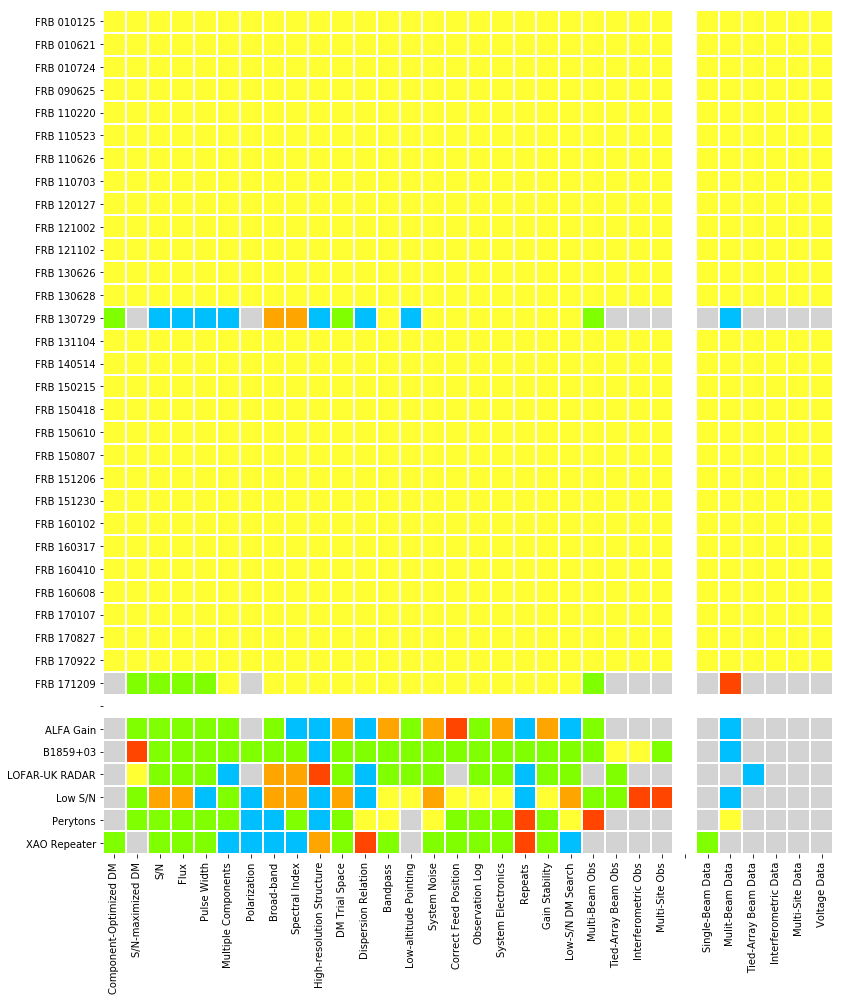

In [14]:
# criteria
#POSTIVE - green
#NEUTRAL - blue
#UNKNOWN - yellow
#NEGATIVE - orange
#CRITICAL - red
#NOTVALID - grey

# data
# POSITIVE - green - desirable data
# NEUTRAL - blue - limited/minimum data
# NEGATIVE - orange - missing some data
# CRITICAL - red - no data
#NOTVALID - grey - not valid data type for observation setup
cmap = colors.ListedColormap(['chartreuse', 'deepskyblue', '#FFFF33', 'orange', 'orangered', 'lightgrey'])

fig = plt.figure(figsize=(12,14)) # (width, height)

sns.heatmap(numDf, cmap=cmap, cbar=False, square=True, linewidths=1)

plt.tight_layout()
plt.savefig('FRBheatmap.pdf')